In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [3]:
path="/Users/ben/Dropbox/PhD/canyon-b/"
df = pd.read_csv(path+"canyonb_annual_pyco2sys_full.csv",
                 usecols=["InSitu_Temperature", "Salinity", "pH", "Phosphate", "Depth", "Latitude", "Longitude", "Alkalinity", 
                          "DIC", "pH", "saturation_calcite", "saturation_aragonite", "Pressure", "Dissolved oxygen"])

obs = pd.read_csv("../compilation/data/in_situ_rates_compiled_allvar_uncertainty.csv")

# depth levels
depth = np.array([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,125,150,175,200,225,250,275,300,325,350,
       375,400,425,450,475,500,550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200,1250,1300,1350,1400,
       1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,
       3000,3100,3200,3300,3400,3500,3600,3700,3800,3900,4000,4100,4200,4300,4400,4500,4600,4700,4800,4900,
       5000,5100,5200,5300,5400,5500])

# only using the ones divisible by 100
df_depth = df[df["Depth"]%100 == 0]

## Figure S12

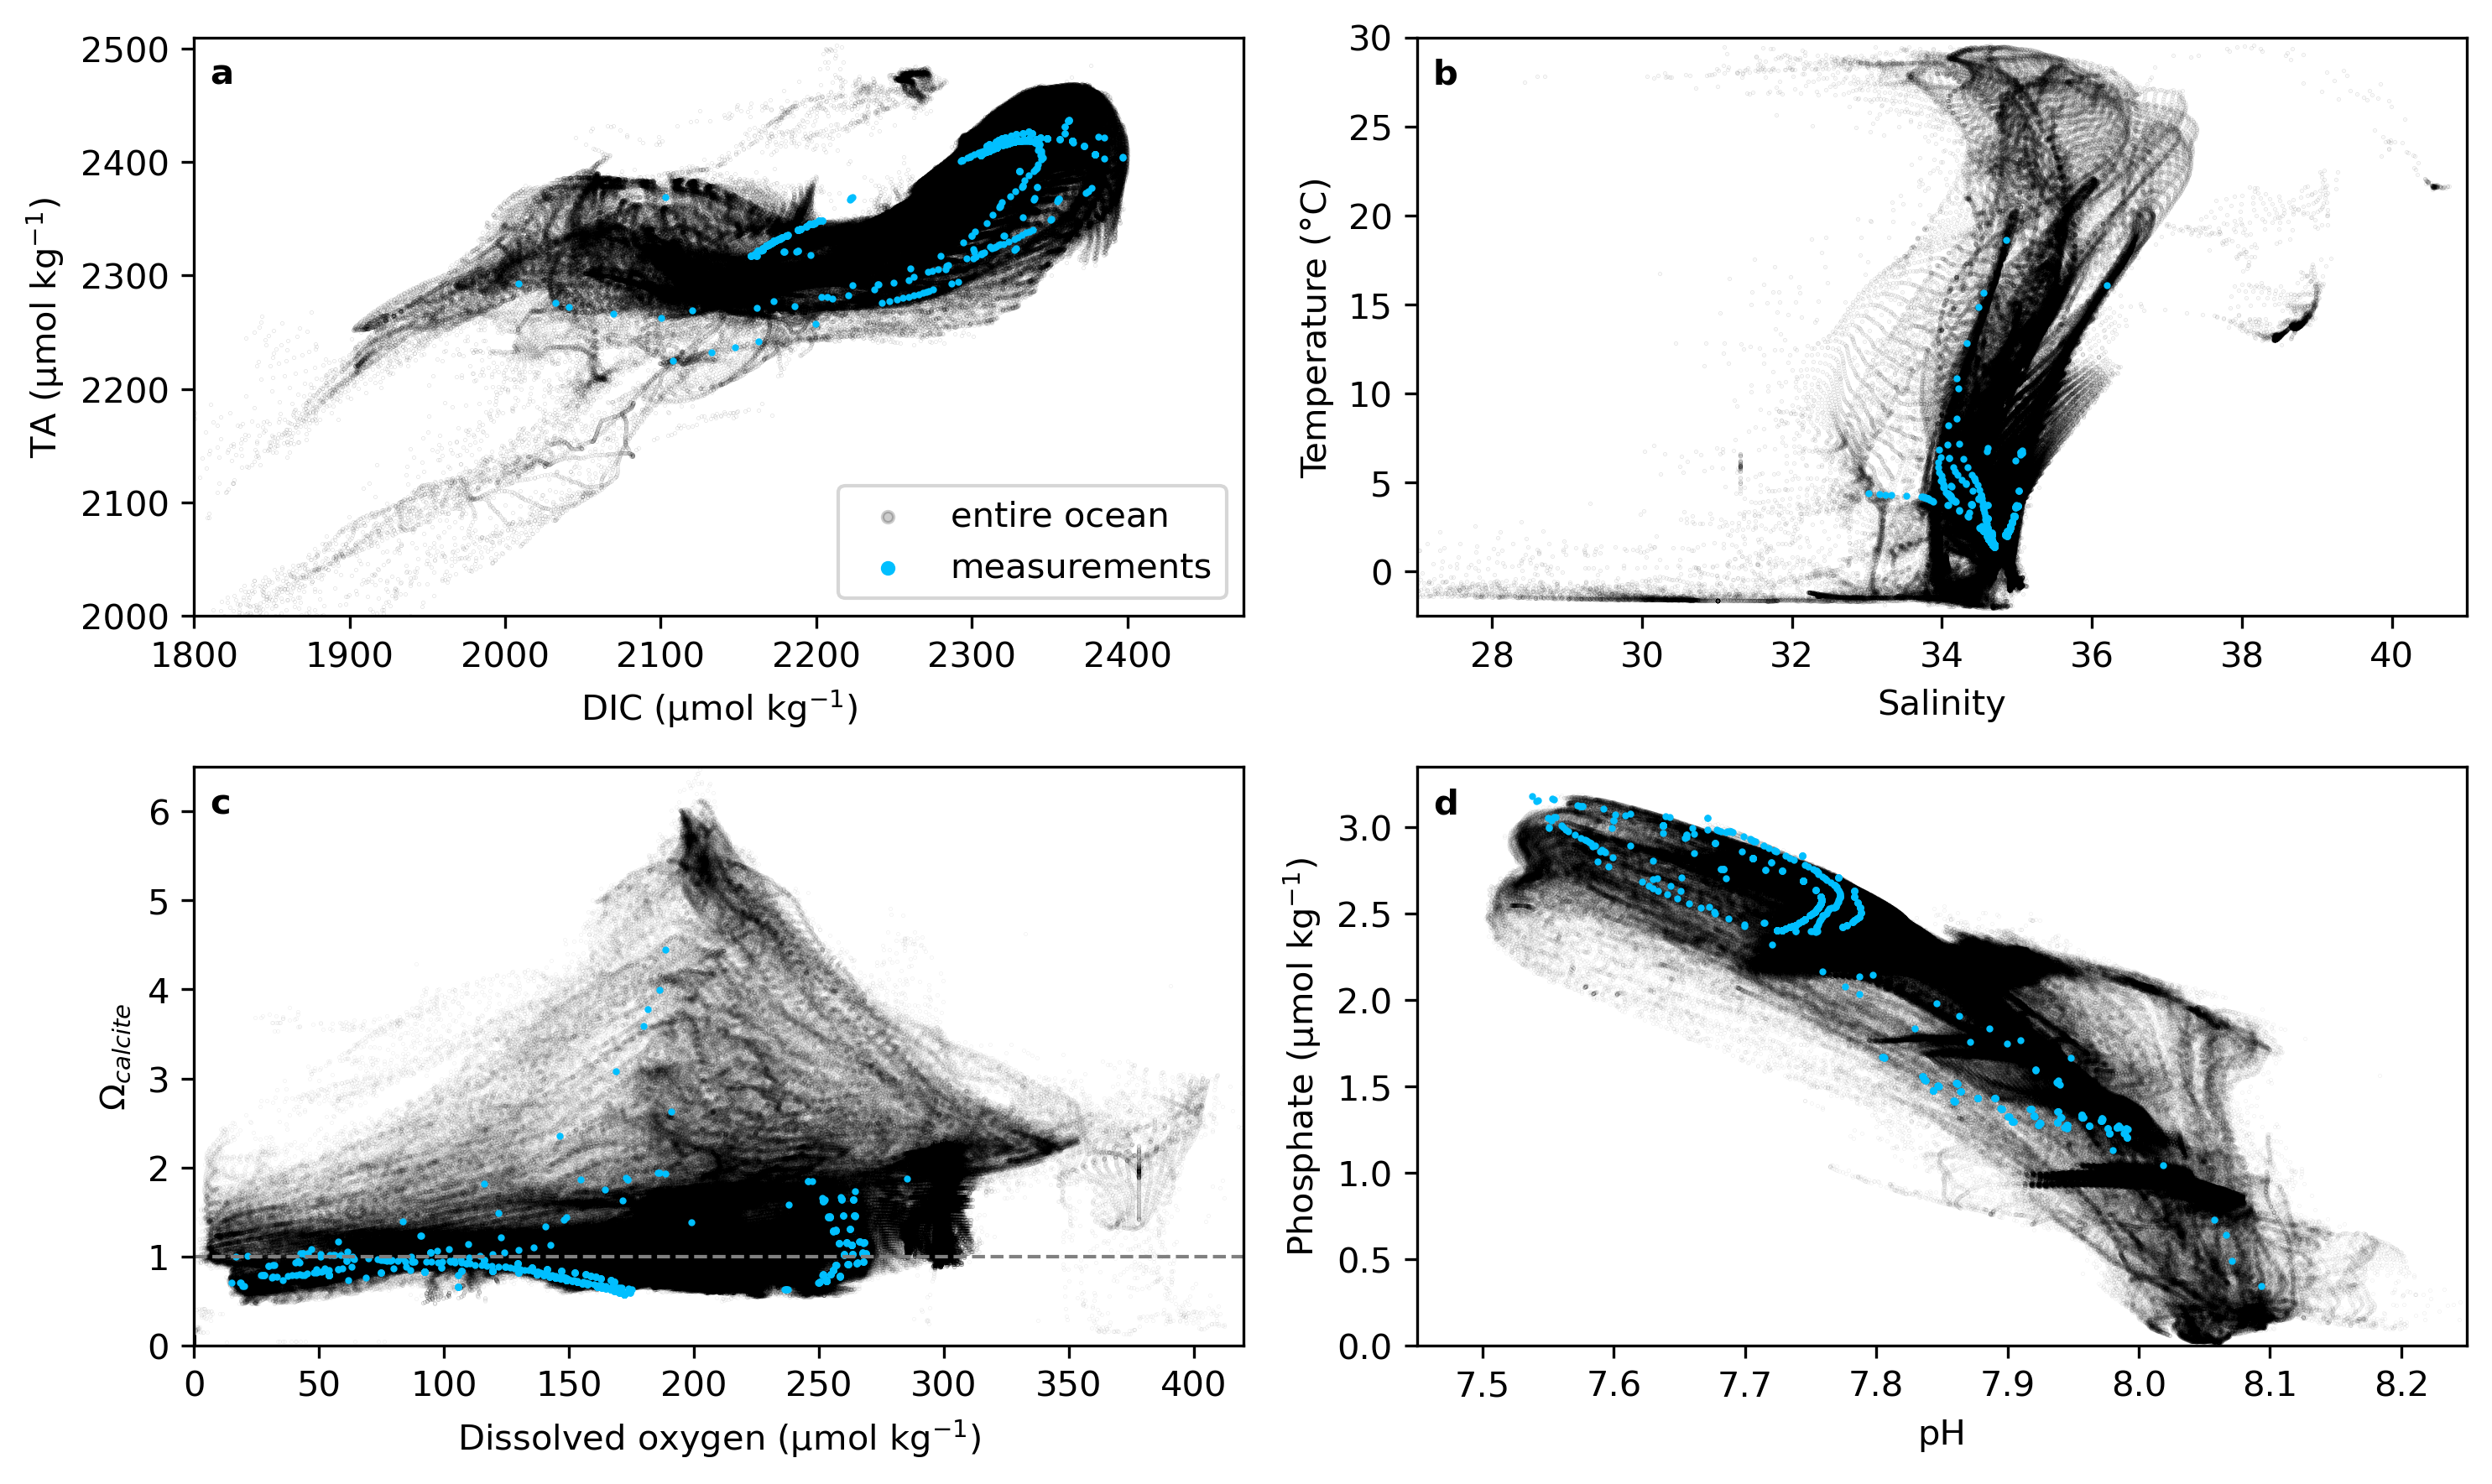

In [10]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, dpi=300, figsize=(10,6))

ax1.scatter(df_depth["DIC"], df_depth["Alkalinity"], s=0.01, alpha=0.2, color="black", label="entire ocean")
ax1.scatter(obs["DIC_cb"], obs["TA_cb"], s=1, color="deepskyblue", label="measurements")
ax1.set_xlabel("DIC (μmol kg$^{-1}$)")
ax1.set_ylabel("TA (μmol kg$^{-1}$)")
ax1.set_xlim(1800)
ax1.set_ylim(2000,2510)
ax1.text(0.015,0.92,'a', transform=ax1.transAxes,fontweight='bold')

lgnd = ax1.legend(loc="lower right", scatterpoints=1, fontsize=10)
for handle in lgnd.legendHandles:
    handle.set_sizes([10.0])
    
ax2.scatter(df_depth["Salinity"], df_depth["InSitu_Temperature"], s=0.05, alpha=0.1, color="black", label="WOA")
ax2.scatter(obs["Sal_woa"], obs["Temp_woa"], s=1, color="deepskyblue", label="measurements")
ax2.set_ylabel("Temperature (°C)")
ax2.set_xlabel("Salinity")
ax2.set_xlim(27,41)
ax2.set_ylim(-2.5,30)
ax2.text(0.015,0.92,'b', transform=ax2.transAxes,fontweight='bold')

ax3.scatter(df_depth["Dissolved oxygen"], df_depth["saturation_calcite"], s=0.01, alpha=0.1, color="black", label="WOA")
ax3.scatter(obs["Doxy_woa"], obs["Oca_calc23"], s=1, color="deepskyblue", label="measurements")
ax3.set_xlabel("Dissolved oxygen (μmol kg$^{-1}$)")
ax3.set_ylabel("$\Omega_{calcite}$")
ax3.hlines(1,0,450, linestyle="dashed", color="grey", linewidth=1)
ax3.set_ylim(0,6.5)
ax3.set_xlim(0,420)
ax3.text(0.015,0.92,'c', transform=ax3.transAxes,fontweight='bold')

ax4.scatter(df_depth["pH"], df_depth["Phosphate"], s=0.01, alpha=0.1, color="black",label="WOA")
ax4.scatter(obs["pH_insitu_cb"], obs["PO4_cb"], s=1, color="deepskyblue", label="measurements")
ax4.set_xlabel("pH")
ax4.set_ylabel("Phosphate (μmol kg$^{-1}$)")
ax4.set_xlim(7.45,8.25)
ax4.set_ylim(0)
ax4.text(0.015,0.92,'d', transform=ax4.transAxes,fontweight='bold')



plt.tight_layout()
plt.show()